# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


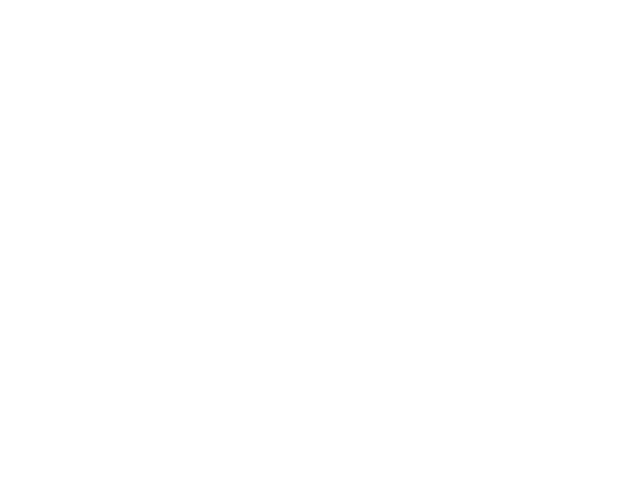

<IPython.core.display.Javascript object>


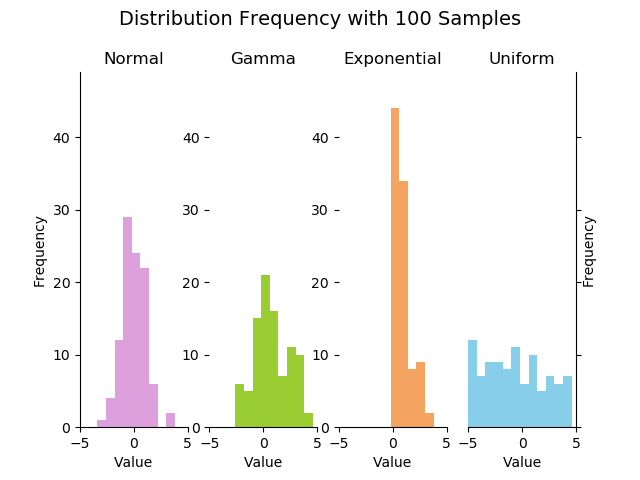

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

n = 100

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, n)
x2 = np.random.gamma(5, 1, n)-4
x3 = np.random.exponential(1, n)
x4 = np.random.uniform(-5, 5, n)

bins = np.arange(-5, 5, .8)

# Compute the max value for exponential distribution to use in all subplots
fig = plt.figure()
y, x, _ = plt.hist(x3, bins=bins)
ymax = y.max()
plt.cla()
plt.clf()
#plt.close()

# create 1x4 grid of axis subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True)

# allows for more space between the grid and the main title
plt.subplots_adjust(top=0.85)

ax1.set_title('Normal')
ax2.set_title('Gamma')
ax3.set_title('Exponential')
ax4.set_title('Uniform')

axs = [ax1, ax2, ax3, ax4]

for k in range(0,len(axs)):
    axs[k].axis([-5, 5,0,ymax+5])
    axs[k].set_xlabel('Value')
    axs[k].spines['top'].set_visible(False)

for k in range(1,len(axs)-1):
    axs[k].spines['left'].set_visible(False)
    axs[k].spines['right'].set_visible(False)
    axs[k].tick_params(left='off', labelleft='off')

ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Frequency')

ax4.spines['left'].set_visible(False)
ax4.yaxis.set_label_position('right')
ax4.set_ylabel('Frequency')
ax4.yaxis.tick_right()

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n:
        print("Completed")
        a.event_source.stop()
        
    plt.suptitle('Distribution Frequency with {} Samples'.format(curr), fontsize=14)
    plt.gca().axis([-5, 5,0,ymax+5])
    ax1.hist(x1[:curr], bins=bins, color='plum')
    ax2.hist(x2[:curr], bins=bins, color='yellowgreen')
    ax3.hist(x3[:curr], bins=bins, color='sandybrown')
    ax4.hist(x4[:curr], bins=bins, color='skyblue')
    
#fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=10)


This on is just for fun:

<IPython.core.display.Javascript object>


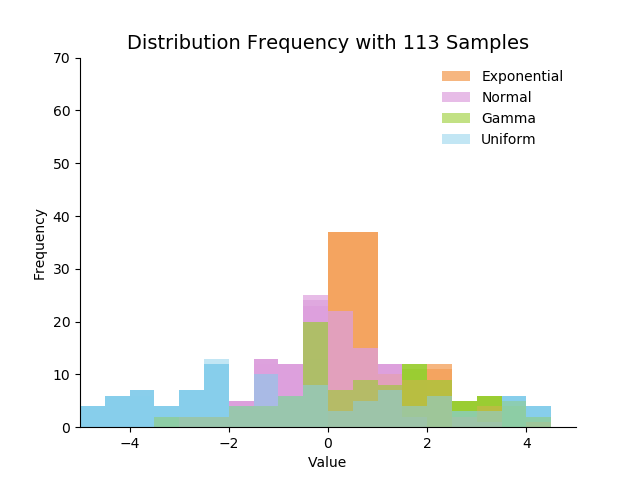

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

n = 150

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, n)
x2 = np.random.gamma(5, 1, n)-4
x3 = np.random.exponential(1, n)
x4 = np.random.uniform(-5, 5, n)

bins = np.arange(-5, 5, .5)

fig = plt.figure()
ax = plt.gca()
ax.axis([-5, 5,0,70])
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.title('Distribution Frequency with {} Samples'.format(curr), fontsize=14)
    plt.hist(x3[:curr], bins=bins, color='sandybrown', alpha=0.8)
    plt.hist(x1[:curr], bins=bins, color='plum', alpha=0.7)
    plt.hist(x2[:curr], bins=bins, color='yellowgreen', alpha=0.6)    
    plt.hist(x4[:curr], bins=bins, color='skyblue', alpha=0.5)
    plt.legend(['Exponential', 'Normal', 'Gamma', 'Uniform'], frameon=False)

a = animation.FuncAnimation(fig, update, interval=10)
